In [109]:
!pip install "pandas>=2.0.0"

In [110]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, HTML, Latex
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()  # Plot using the seaborn style

#print( f"Python {sys.version}" )
#print( f"Pandas {pd.__version__}" )
#print( f"NumPy {np.__version__}" )
#print( f"IPython {IPython.__version__}" )

# Part1:ประเทศที่มี Happiness score สูงและต่ำ มีผลต่อการเป็นโรค Depression และ Anxiety อย่างไร


#1.1.Ranking of happiness score 2015-2020

Import data for ranking country

In [111]:
# Read from a CSV file
df_hap = pd.read_csv('DataPanelWHR2021.csv')

#Select column country and happiness score
df_hap = df_hap[ ['Country name','year','Life Ladder'] ].query("year == [2015,2016,2017,2018,2019,2020]").reset_index(drop=True)

display(df_hap)

,Country name,year,Life Ladder
0,Afghanistan,2015,3.983
1,Afghanistan,2016,4.220
2,Afghanistan,2017,2.662
3,Afghanistan,2018,2.694
4,Afghanistan,2019,2.375
...,...,...,...
808,Zimbabwe,2016,3.735
809,Zimbabwe,2017,3.638
810,Zimbabwe,2018,3.616
811,Zimbabwe,2019,2.694


Ranking 20 countries the highest of happiness score.

In [112]:

df_15 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2015")
df_15 = df_15.sort_values('Life Ladder',ascending= False).iloc[:20].reset_index(drop=True)
df_15.insert(1, "2015", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_15 = df_15.loc[:,['Country name','2015']]

df_16 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2016")
df_16 = df_16.sort_values('Life Ladder',ascending=False).iloc[:20].reset_index(drop=True)
df_16.insert(1, "2016", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_16 = df_16.loc[:,['Country name','2016']]

df_17 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2017")
df_17 = df_17.sort_values('Life Ladder',ascending=False).iloc[:20].reset_index(drop=True)
df_17.insert(1, "2017", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_17 = df_17.loc[:,['Country name','2017']]

df_18 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2018")
df_18 = df_18.sort_values('Life Ladder',ascending=False).iloc[:20].reset_index(drop=True)
df_18.insert(1, "2018", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_18 = df_18.loc[:,['Country name','2018']]

df_19 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2019")
df_19 = df_19.sort_values('Life Ladder',ascending=False).iloc[:20].reset_index(drop=True)
df_19.insert(1, "2019", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_19 = df_19.loc[:,['Country name','2019']]

df_20 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2020")
df_20 = df_20.sort_values('Life Ladder',ascending=False).iloc[:20].reset_index(drop=True)
df_20.insert(1, "2020", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_20 = df_20.loc[:,['Country name','2020']]

df_all = df_15.merge(df_16,how="outer",on='Country name').merge(df_17,how="outer",on='Country name').merge(df_18,how="outer",on='Country name').merge(df_19,how="outer",on='Country name').merge(df_20,how="outer",on='Country name')

df_all['total'] = df_all['2015'].fillna(0) + df_all['2016'].fillna(0)+df_all['2017'].fillna(0)+df_all['2018'].fillna(0)+df_all['2019'].fillna(0)+df_all['2020'].fillna(0)

df_all = df_all.sort_values('total',ascending=False).reset_index(drop=True)

df_all2 = df_all.loc[:,['Country name','2015','2016','2017','2018','2019']].fillna(0).set_index('Country name')

display(df_all)

,Country name,2015,2016,2017,2018,2019,2020,total
0,Finland,16.0,20.0,20.0,20.0,20.0,20.0,116.0
1,Denmark,18.0,18.0,19.0,19.0,18.0,18.0,110.0
2,Switzerland,19.0,15.0,16.0,18.0,19.0,17.0,104.0
3,Norway,20.0,19.0,18.0,16.0,16.0,13.0,102.0
4,Netherlands,13.0,17.0,15.0,17.0,15.0,16.0,93.0
5,Iceland,17.0,16.0,17.0,NaN,17.0,19.0,86.0
6,Sweden,11.0,14.0,10.0,14.0,13.0,15.0,77.0
7,New Zealand,15.0,11.0,12.0,13.0,9.0,12.0,72.0
8,Australia,12.0,13.0,9.0,10.0,10.0,9.0,63.0
9,Austria,9.0,8.0,11.0,15.0,8.0,11.0,62.0


Ranking 20 countries the lowest of happiness score

In [113]:

df_15 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2015")
df_15 = df_15.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_15.insert(1, "2015", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_15 = df_15.loc[:,['Country name','2015']]

df_16 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2016")
df_16 = df_16.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_16.insert(1, "2016", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_16 = df_16.loc[:,['Country name','2016']]

df_17 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2017")
df_17 = df_17.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_17.insert(1, "2017", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_17 = df_17.loc[:,['Country name','2017']]

df_18 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2018")
df_18 = df_18.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_18.insert(1, "2018", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_18 = df_18.loc[:,['Country name','2018']]

df_19 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2019")
df_19 = df_19.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_19.insert(1, "2019", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_19 = df_19.loc[:,['Country name','2019']]

df_20 = df_hap[ ['Country name','year','Life Ladder'] ].query("year == 2020")
df_20 = df_20.sort_values('Life Ladder',ascending=True).iloc[:20].reset_index(drop=True)
df_20.insert(1, "2020", [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], True)
df_20 = df_20.loc[:,['Country name','2020']]

df_all = df_15.merge(df_16,how="outer",on='Country name').merge(df_17,how="outer",on='Country name').merge(df_18,how="outer",on='Country name').merge(df_19,how="outer",on='Country name').merge(df_20,how="outer",on='Country name')

df_all['total'] = df_all['2015'].fillna(0) + df_all['2016'].fillna(0)+df_all['2017'].fillna(0)+df_all['2018'].fillna(0)+df_all['2019'].fillna(0)+df_all['2020'].fillna(0)

df_all = df_all.sort_values('total',ascending=False).reset_index(drop=True)

df_all2 = df_all.loc[:,['Country name','2015','2016','2017','2018','2019']].fillna(0).set_index('Country name')

display(df_all)

,Country name,2015,2016,2017,2018,2019,2020,total
0,Tanzania,12.0,18.0,16.0,17.0,12.0,19.0,94.0
1,Rwanda,17.0,17.0,18.0,15.0,17.0,NaN,84.0
2,Zimbabwe,10.0,10.0,12.0,13.0,19.0,20.0,84.0
3,Yemen,19.0,8.0,17.0,19.0,6.0,NaN,69.0
4,Malawi,7.0,14.0,15.0,18.0,11.0,NaN,65.0
5,Botswana,9.0,13.0,13.0,16.0,14.0,NaN,65.0
6,Afghanistan,3.0,NaN,20.0,20.0,20.0,NaN,63.0
7,Haiti,15.0,16.0,10.0,14.0,NaN,NaN,55.0
8,India,NaN,NaN,6.0,11.0,18.0,17.0,52.0
9,Liberia,20.0,15.0,NaN,5.0,NaN,NaN,40.0


# 1.2.Percent of Depression and Anxiety

Percent of depression 20 countries.(10 countries highest and 10 countries lowest of happiness score)

In [114]:

# Read from a CSV file
df_depression = pd.read_csv('%depression by year country.csv')

#display(df_depression)
df_depression_1 = df_depression.loc[ : , ['Entity','Year','Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] ].rename({'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized':'% Depression'}, axis=1)

#display(df_depression_1)
df_depression_2 = df_depression_1.query("Entity== ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']")

#display(df_depression_2)
df_depression_2.set_index("Entity",inplace =True)
display(df_depression_2)

,Year,% Depression
Entity,,
Afghanistan,1990,4.996118
Afghanistan,1991,4.989290
Afghanistan,1992,4.981346
Afghanistan,1993,4.976958
Afghanistan,1994,4.977782
...,...,...
Zimbabwe,2015,3.407624
Zimbabwe,2016,3.410755
Zimbabwe,2017,3.411965


Percent of anxiety 20 countries.(10 countries highest and 10 countries lowest of happiness score)

In [115]:

#Read from a CSV file
df_anxiety = pd.read_csv('percent disorder type-by country and year.csv')

#display(df_anxiety)
df_anxiety_1 = df_anxiety.loc[ : , ['Entity','Year','Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] ].rename({'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'% Anxiety'}, axis=1)

#display(df_anxiety_1)
df_anxiety_2 = df_anxiety_1.query("Entity == ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']")

#display(df_anxiety_2)
df_anxiety_2.set_index("Entity",inplace =True)
display(df_anxiety_2)

,Year,% Anxiety
Entity,,
Afghanistan,1990,4.713314
Afghanistan,1991,4.702100
Afghanistan,1992,4.683743
Afghanistan,1993,4.673549
Afghanistan,1994,4.670810
...,...,...
Zimbabwe,2015,3.184012
Zimbabwe,2016,3.187148
Zimbabwe,2017,3.188418


# 1.3.Compare percent of happiness and depression (2015 - 2019 )               

Compare all countries

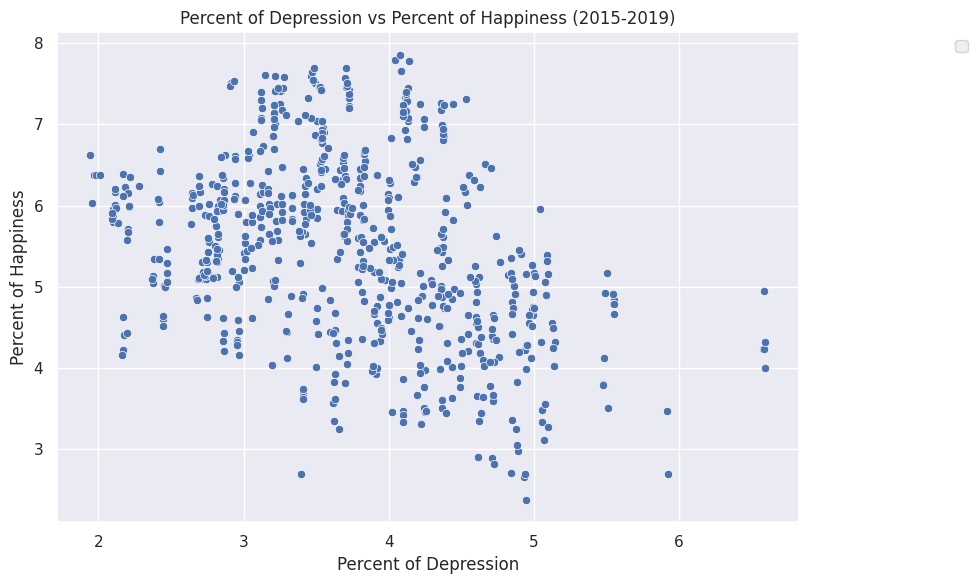

In [116]:

# Read the depression and happiness CSV files into DataFrames
df_depression = pd.read_csv('%depression by year country.csv')
df_happiness = pd.read_csv('happiness score for 2020 and factor.csv')

# Select the  columns and rename
df_depression_1 = df_depression.loc[:, ['Entity', 'Year', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_depression_1 = df_depression_1.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': '% Depression'})
df_happiness_1 = df_happiness.loc[:, ['Country name', 'year', 'Life Ladder']].rename(columns={'Country name':'Entity', 'year':'Year', 'Life Ladder': '% Happiness'})

# Filter the DataFrames  (countries and years)
countries = df_depression_1['Entity'].unique()  # Updated to include all countries in df_depression_1
years = [2015, 2016, 2017, 2018, 2019]

# Merge the depression and happiness DataFrames
df_merged = df_depression_1.merge(df_happiness_1, on=['Entity', 'Year'])

# Filter the merged DataFrame ( countries and years )
df_filtered = df_merged[(df_merged['Entity'].isin(countries)) & (df_merged['Year'].isin(years))]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df_filtered, x='% Depression', y='% Happiness', ax=ax)

# Set the title and labels
ax.set_title('Percent of Depression vs Percent of Happiness (2015-2019)')
ax.set_xlabel('Percent of Depression')
ax.set_ylabel('Percent of Happiness')

# Place the "Entity" label outside the graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.2, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout
plt.show()

Compare 20 countries(10 countries highest and 10 countries lowest of happiness score)

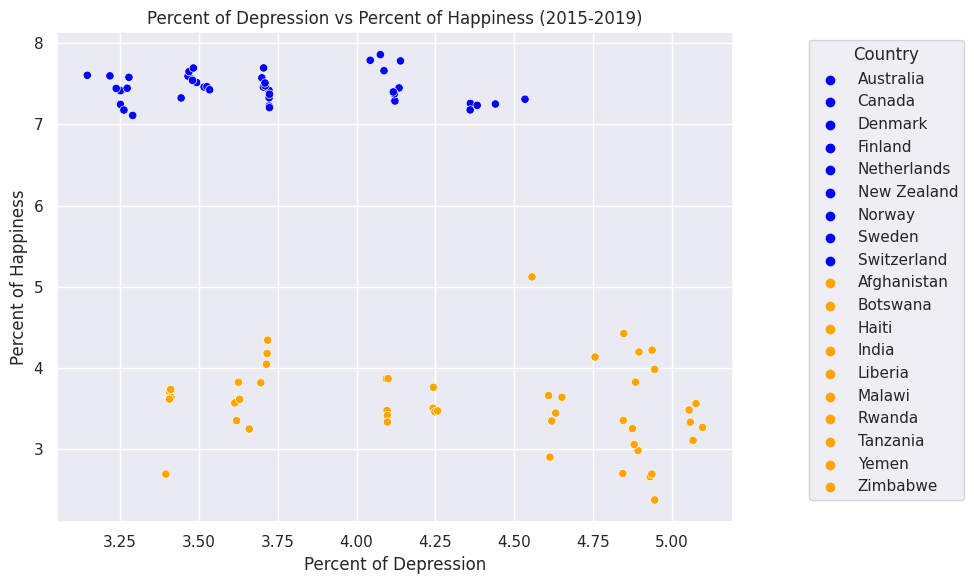

In [117]:
import matplotlib.pyplot as plt

# Read the depression and happiness CSV files into DataFrames
df_depression = pd.read_csv('%depression by year country.csv')
df_happiness = pd.read_csv('happiness score for 2020 and factor.csv')

# Select the columns and rename
df_depression_1 = df_depression.loc[:, ['Entity', 'Year', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_depression_1 = df_depression_1.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': '% Depression'})
df_happiness_1 = df_happiness.loc[:, ['Country name', 'year', 'Life Ladder']].rename(columns={'Country name':'Entity', 'year':'Year', 'Life Ladder': '% Happiness'})

# Filter the DataFrames (countries and years)
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
years = [2015, 2016, 2017, 2018, 2019]

# Merge the depression and happiness DataFrames
df_merged = df_depression_1.merge(df_happiness_1, on=['Entity', 'Year'])

# Filter the merged DataFrame (countries and years)
df_filtered = df_merged[(df_merged['Entity'].isin(countries)) & (df_merged['Year'].isin(years))]

countries_hap = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai']
countries_unhap = ['Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']

df_filtered_hap=df_filtered[df_filtered['Entity'].isin(countries_hap)]
df_filtered_unhap=df_filtered[df_filtered['Entity'].isin(countries_unhap)]
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot with hue
sns.scatterplot(data=df_filtered_hap, x='% Depression', y='% Happiness', hue='Entity', ax=ax, palette={'Denmark': 'blue', 'Finland': 'blue', 'Switzerland': 'blue', 'Norway': 'blue', 'Netherlands': 'blue', 'Canada': 'blue', 'New Zealand': 'blue', 'Sweden': 'blue', 'Australia': 'blue', 'Austrai': 'blue'})
sns.scatterplot(data=df_filtered_unhap, x='% Depression', y='% Happiness', hue='Entity', ax=ax, palette={'Tanzania': 'orange', 'Rwanda': 'orange', 'Zimbabwe': 'orange', 'Yemen': 'orange', 'Botswana': 'orange', 'Malawi': 'orange', 'Afghanistan': 'orange', 'Haiti': 'orange', 'India': 'orange', 'Liberia': 'orange'})

# Set the title and labels
ax.set_title('Percent of Depression vs Percent of Happiness (2015-2019)')
ax.set_xlabel('Percent of Depression')
ax.set_ylabel('Percent of Happiness')

# Place the "Entity" label outside the graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), loc='upper left', title='Country',borderaxespad = 0.5,frameon=2)

plt.tight_layout()  # Adjust the layout
plt.show()

# 1.4.Compare percent of happiness and anxiety (2015 - 2019 )               

Compare all countries

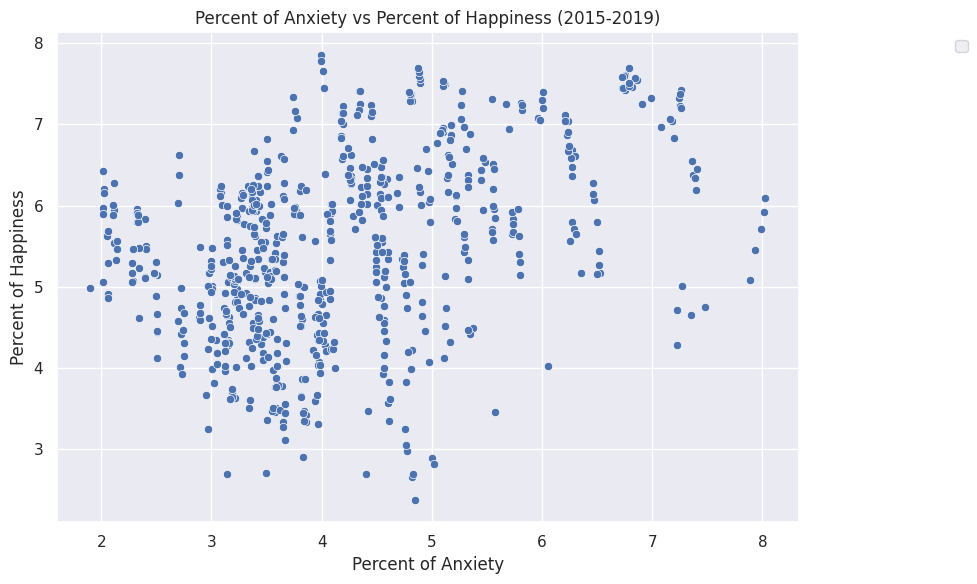

In [118]:

# Read the anxiety and happiness CSV files into DataFrames
df_anxiety = pd.read_csv('percent disorder type-by country and year.csv')
df_happiness = pd.read_csv('happiness score for 2020 and factor.csv')

# Select the  columns and rename
df_anxiety_1 = df_anxiety.loc[:, ['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_anxiety_1 = df_anxiety_1.rename(columns={'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': '% Anxiety'})

df_happiness_1 = df_happiness.loc[:, ['Country name', 'year', 'Life Ladder']].rename(columns={'Country name':'Entity', 'year':'Year', 'Life Ladder': '% Happiness'})

# Filter the DataFrames ( countries and years)
countries = df_depression_1['Entity'].unique()  # Updated to include all countries in df_depression_1
years = [2015, 2016, 2017, 2018, 2019]

# Merge the anxiety and happiness DataFrames
df_merged = df_anxiety_1.merge(df_happiness_1, on=['Entity', 'Year'])

# Filter the merged DataFrame ( countries and years)
df_filtered = df_merged[(df_merged['Entity'].isin(countries)) & (df_merged['Year'].isin(years))]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df_filtered, x='% Anxiety', y='% Happiness',  ax=ax)

# Set the title and labels
ax.set_title('Percent of Anxiety vs Percent of Happiness (2015-2019)')
ax.set_xlabel('Percent of Anxiety')
ax.set_ylabel('Percent of Happiness')

# Place the "Entity" label outside the graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.2, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout
plt.show()

Compare 20 countries (10 countries highest and 10 countries lowest of happiness score)

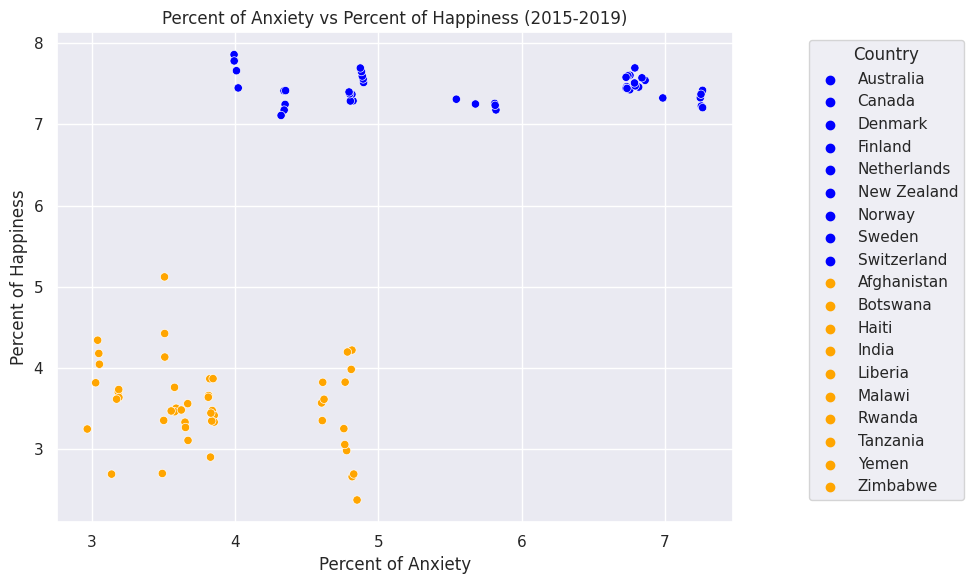

In [119]:

# Read the anxiety and happiness CSV files into DataFrames
df_anxiety = pd.read_csv('percent disorder type-by country and year.csv')
df_happiness = pd.read_csv('happiness score for 2020 and factor.csv')

# Select columns and rename
df_anxiety_1 = df_anxiety.loc[:, ['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_anxiety_1 = df_anxiety_1.rename(columns={'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': '% Anxiety'})

df_happiness_1 = df_happiness.loc[:, ['Country name', 'year', 'Life Ladder']].rename(columns={'Country name':'Entity', 'year':'Year', 'Life Ladder': '% Happiness'})

# Filter the DataFrames ( countries and years)
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
years = [2015, 2016, 2017, 2018, 2019]

# Merge the anxiety and happiness DataFrames
df_merged = df_anxiety_1.merge(df_happiness_1, on=['Entity', 'Year'])

# Filter the merged DataFrame (countries and years)
df_filtered = df_merged[(df_merged['Entity'].isin(countries)) & (df_merged['Year'].isin(years))]

countries_hap = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai']
countries_unhap = ['Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']

df_filtered_hap=df_filtered[df_filtered['Entity'].isin(countries_hap)]
df_filtered_unhap=df_filtered[df_filtered['Entity'].isin(countries_unhap)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))



# Create the scatter plot with hue
#sns.scatterplot(data=df_filtered, x='% Anxiety', y='% Happiness', hue='Entity', ax=ax, palette={'Denmark': 'blue', 'Finland': 'blue', 'Switzerland': 'blue', 'Norway': 'blue', 'Netherlands': 'blue', 'Canada': 'blue', 'New Zealand': 'blue', 'Sweden': 'blue', 'Australia': 'blue', 'Austrai': 'blue', 'Tanzania': 'orange', 'Rwanda': 'orange', 'Zimbabwe': 'orange', 'Yemen': 'orange', 'Botswana': 'orange', 'Malawi': 'orange', 'Afghanistan': 'orange', 'Haiti': 'orange', 'India': 'orange', 'Liberia': 'orange'})
sns.scatterplot(data=df_filtered_hap, x='% Anxiety', y='% Happiness', hue='Entity', ax=ax, palette={'Denmark': 'blue', 'Finland': 'blue', 'Switzerland': 'blue', 'Norway': 'blue', 'Netherlands': 'blue', 'Canada': 'blue', 'New Zealand': 'blue', 'Sweden': 'blue', 'Australia': 'blue', 'Austrai': 'blue'})
sns.scatterplot(data=df_filtered_unhap, x='% Anxiety', y='% Happiness', hue='Entity', ax=ax, palette={'Tanzania': 'orange', 'Rwanda': 'orange', 'Zimbabwe': 'orange', 'Yemen': 'orange', 'Botswana': 'orange', 'Malawi': 'orange', 'Afghanistan': 'orange', 'Haiti': 'orange', 'India': 'orange', 'Liberia': 'orange'})


# Create the scatter plot
#sns.scatterplot(data=df_filtered, x='% Anxiety', y='% Happiness', hue='Entity', ax=ax)

# Set the title and labels

ax.set_title('Percent of Anxiety vs Percent of Happiness (2015-2019)')
ax.set_xlabel('Percent of Anxiety')
ax.set_ylabel('Percent of Happiness')

# Place the "Entity" label outside the graph
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), loc='upper left')

# Place the "Entity" label outside the graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), loc='upper left', title='Country')



plt.tight_layout()  # Adjust the layout
plt.show()





# 2.Compare percent of depression and anxiety by country with all countries in year.

เพื่อต้องการทราบว่าประเทศที่มี percent happiness สูงและต่ำ 10 อันดับแรก ในแต่ละปี จะมี percent การเป็น depression and anxiety สูงกว่าหรือต่ำกว่า percent การเป็น depression and anxiety ของทุกประเทศในปีนั้นๆ

2.1.Import and prepare data




Select and merge column

In [94]:

# Read the  CSV files into DataFrames
df_disorder = pd.read_csv('number  disorder type-by country and year.csv')
df_prevalence = pd.read_csv('prevalence-of-depression-males-vs-females.csv')

#display(df_disorder)
df_disorder_1 = df_disorder.loc[:, ['Entity', 'Year', 'Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number)', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)']].rename(columns={'Entity':'Country','Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number)': 'Number_Anxiety', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)': 'Number_Depression'})
#df_disorder_1 = df_disorder.loc[:, ['Entity', 'Year', 'Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number)', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)']].rename(columns={'Entity':'Country','Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number)': 'Number_Anxiety', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)': 'Number_Depression'})
df_prevalence_1 = df_prevalence.loc[:, ['Entity', 'Year', 'Population (historical estimates)']].rename(columns={'Entity':'Country'})

#MergeDisorder_Prevalence
merged_df = df_disorder_1.merge(df_prevalence_1, on=['Country', 'Year'])
display(merged_df)

,Country,Year,Number_Anxiety,Number_Depression,Population (historical estimates)
0,Afghanistan,1990,486787,439837,10694804.0
1,Afghanistan,1991,532646,478890,10745168.0
2,Afghanistan,1992,609249,545449,12057436.0
3,Afghanistan,1993,662644,593044,14003764.0
4,Afghanistan,1994,685973,613915,15455560.0
...,...,...,...,...,...
6145,Zimbabwe,2015,406668,354911,14154937.0
6146,Zimbabwe,2016,414509,363160,14452705.0
6147,Zimbabwe,2017,422440,371659,14751101.0
6148,Zimbabwe,2018,428804,380391,15052191.0


Sum disorder depression by year.

In [95]:
#SUM_disorder_Depression by year
sum_by_year = df_disorder_1.groupby('Year')['Number_Depression'].sum().reset_index()
sum_by_year = sum_by_year.rename(columns={'Number_Depression': 'Sum_Number_Depression'})
display(sum_by_year)


#sum_by_year = df_disorder_1.groupby('Year')['Number_Depression'].sum()

#display(sum_by_year)

,Year,Sum_Number_Depression
0,1990,1015938673
1,1991,1046235701
2,1992,1075257909
3,1993,1102570956
4,1994,1128011663
5,1995,1151060711
6,1996,1171911740
7,1997,1191248516
8,1998,1209963290
9,1999,1229211616


Sum disorder anxiety by year

In [96]:
#SUM_disorder_Anxiety by year
sum_by_year_1 = df_disorder_1.groupby('Year')['Number_Anxiety'].sum().reset_index()
sum_by_year_1 = sum_by_year_1.rename(columns={'Number_Anxiety': 'Sum_Number_Anxiety'})
display(sum_by_year_1)


#sum_by_year_1 = df_disorder_1.groupby('Year')['Number_Anxiety'].sum()

#display(sum_by_year_1)

,Year,Sum_Number_Anxiety
0,1990,1166900961
1,1991,1184753316
2,1992,1202706307
3,1993,1220793007
4,1994,1239121646
5,1995,1257745364
6,1996,1280550146
7,1997,1309185293
8,1998,1340418063
9,1999,1370919312


Sum prevalance population by year (1990 - 2019)

In [97]:
#SUM_Prevalance by year(1990 - 2019)
sum_by_year_2 = df_prevalence_1[df_prevalence_1['Year'].between(1990, 2019)].groupby('Year')['Population (historical estimates)'].sum().reset_index()
sum_by_year_2 = sum_by_year_2.rename(columns={'Population (historical estimates)': 'Sum_Population (historical estimates)'})
display(sum_by_year_2)



#sum_by_year_2 = df_prevalence_1[df_prevalence_1['Year'].between(1990, 2019)].groupby('Year')['Population (historical estimates)'].sum()

#display(sum_by_year_2)

,Year,Sum_Population (historical estimates)
0,1990,2.745799e+10
1,1991,2.782145e+10
2,1992,2.796674e+10
3,1993,2.836955e+10
4,1994,2.871373e+10
5,1995,2.912660e+10
6,1996,2.953645e+10
7,1997,2.994320e+10
8,1998,3.034731e+10
9,1999,3.074940e+10


Merge data sum by year.

In [98]:
#Merge_by_Year #data of Depression & Anxirty & Population

merged_df = sum_by_year.merge(sum_by_year_1, on='Year').merge(sum_by_year_2, on='Year')

display(merged_df)

,Year,Sum_Number_Depression,Sum_Number_Anxiety,Sum_Population (historical estimates)
0,1990,1015938673,1166900961,2.745799e+10
1,1991,1046235701,1184753316,2.782145e+10
2,1992,1075257909,1202706307,2.796674e+10
3,1993,1102570956,1220793007,2.836955e+10
4,1994,1128011663,1239121646,2.871373e+10
5,1995,1151060711,1257745364,2.912660e+10
6,1996,1171911740,1280550146,2.953645e+10
7,1997,1191248516,1309185293,2.994320e+10
8,1998,1209963290,1340418063,3.034731e+10
9,1999,1229211616,1370919312,3.074940e+10


Percent of depression & anxiety compare wtith population.(1990-2019)

In [99]:

#Percent of Depression & Anxiety wtith Population (all year)

#merged data
merged_df['%Depression'] = (merged_df['Sum_Number_Depression'] * 100) / merged_df['Sum_Population (historical estimates)']
merged_df['%Anxiety'] = (merged_df['Sum_Number_Anxiety'] * 100) / merged_df['Sum_Population (historical estimates)']

display(merged_df)


,Year,Sum_Number_Depression,Sum_Number_Anxiety,Sum_Population (historical estimates),%Depression,%Anxiety
0,1990,1015938673,1166900961,2.745799e+10,3.699974,4.249768
1,1991,1046235701,1184753316,2.782145e+10,3.760536,4.258416
2,1992,1075257909,1202706307,2.796674e+10,3.844774,4.300488
3,1993,1102570956,1220793007,2.836955e+10,3.886460,4.303181
4,1994,1128011663,1239121646,2.871373e+10,3.928475,4.315432
5,1995,1151060711,1257745364,2.912660e+10,3.951922,4.318202
6,1996,1171911740,1280550146,2.953645e+10,3.967680,4.335491
7,1997,1191248516,1309185293,2.994320e+10,3.978361,4.372229
8,1998,1209963290,1340418063,3.034731e+10,3.987052,4.416925
9,1999,1229211616,1370919312,3.074940e+10,3.997514,4.458361


 Percent of depression & anxiety compare with population (2015-2019)

In [100]:

#filterd by year 2015-2019(Depression & Anxiety)
filtered_df = merged_df[(merged_df['Year'] >= 2015) & (merged_df['Year'] <= 2019)]

display(filtered_df)

,Year,Sum_Number_Depression,Sum_Number_Anxiety,Sum_Population (historical estimates),%Depression,%Anxiety
25,2015,1537670949,1669842832,3.754272e+10,4.095790,4.447847
26,2016,1561689177,1696340181,3.797734e+10,4.112160,4.466717
27,2017,1585792226,1723460005,3.840979e+10,4.128614,4.487033
28,2018,1609821681,1746243750,3.883060e+10,4.145755,4.497081
29,2019,1632738530,1768470333,3.923791e+10,4.161125,4.507045


Percent of depression sum by year.(2015-2019)


In [101]:

#filterd by year 2015-2019(Depression )
filtered_df_all = merged_df[(merged_df['Year'] >= 2015) & (merged_df['Year'] <= 2019)]

display(filtered_df_all.loc[:, ['Year', '%Depression',]])

,Year,%Depression
25,2015,4.095790
26,2016,4.112160
27,2017,4.128614
28,2018,4.145755
29,2019,4.161125


Percent of anxiety sum by year.(2015-2019)

In [102]:

#filterd by year 2015-2019(Anxiety )
filtered_df_all = merged_df[(merged_df['Year'] >= 2015) & (merged_df['Year'] <= 2019)]

display(filtered_df_all.loc[:, ['Year', '%Anxiety',]])

,Year,%Anxiety
25,2015,4.447847
26,2016,4.466717
27,2017,4.487033
28,2018,4.497081
29,2019,4.507045


Percent of depression 20 countries that highest and lowest happiness score(2015-2019)

In [103]:


# Read the CSV file into a DataFrame
df_depression = pd.read_csv('%depression by year country.csv')

# Select the desired columns and rename
df_depression_1 = df_depression.loc[:, ['Entity', 'Year', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_depression_1 = df_depression_1.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': '% Depression','Entity':'Country'})

# Filter the DataFrame for specific countries
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
df_depression_2 = df_depression_1[df_depression_1['Country'].isin(countries)]

# Filter the DataFrame for the years 2015-2019
df_depression_2015_2019 = df_depression_2[df_depression_2['Year'].between(2015, 2019)]

# Set the index to 'Entity' column
df_depression_2015_2019.set_index("Country", inplace=True)

# Display the DataFrame
print(df_depression_2015_2019)

             Year  % Depression
Country                        
Afghanistan  2015      4.944759
Afghanistan  2016      4.937072
Afghanistan  2017      4.930936
Afghanistan  2018      4.936140
Afghanistan  2019      4.945168
...           ...           ...
Zimbabwe     2015      3.407624
Zimbabwe     2016      3.410755
Zimbabwe     2017      3.411965
Zimbabwe     2018      3.406929
Zimbabwe     2019      3.395476

[95 rows x 2 columns]


Percent of anxiety 20 countries that highest and lowest happiness score (2015-2019).


In [104]:

# Read the CSV file into a DataFrame
df_anxiety = pd.read_csv('percent disorder type-by country and year.csv')

# Select the desired columns and rename
df_anxiety_1 = df_anxiety.loc[:, ['Entity', 'Year', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized']]
df_anxiety_1 = df_anxiety_1.rename(columns={'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': '% Anxiety'})

# Filter the DataFrame for specific countries
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
df_anxiety_2 = df_anxiety_1[df_anxiety_1['Entity'].isin(countries)]

# Filter the DataFrame for the years 2015-2019
df_anxiety_2015_2019 = df_anxiety_2[df_anxiety_2['Year'].between(2015, 2019)]

# Set the index to 'Entity' column
df_anxiety_2015_2019.set_index("Entity", inplace=True)

# Display the DataFrame
print(df_anxiety_2015_2019)

             Year  % Anxiety
Entity                      
Afghanistan  2015   4.810425
Afghanistan  2016   4.815518
Afghanistan  2017   4.816584
Afghanistan  2018   4.827913
Afghanistan  2019   4.851035
...           ...        ...
Zimbabwe     2015   3.184012
Zimbabwe     2016   3.187148
Zimbabwe     2017   3.188418
Zimbabwe     2018   3.172111
Zimbabwe     2019   3.137017

[95 rows x 2 columns]


2.2.Graph :เปรียบเทียบ Percent การเป็น Depression แต่ละประเทศ VS ทุกประเทศ ในแต่ละปี(2015-2019)

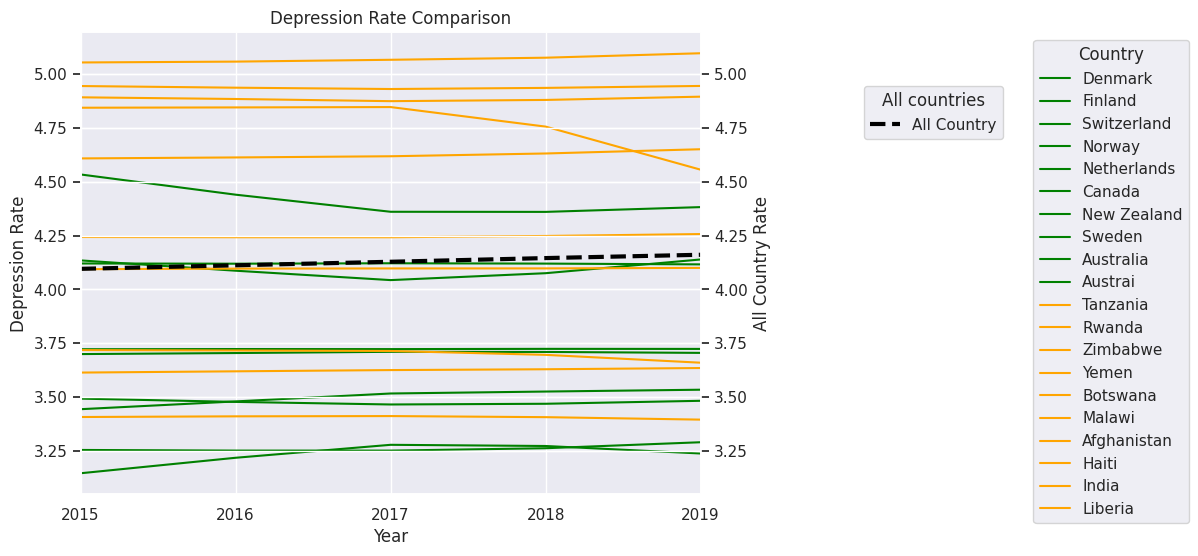

In [106]:

# Read the CSV file into a DataFrame
df = pd.read_csv("%depression by year country.csv")

#Select_country
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
filtered_df = df[df['Entity'].isin(countries)]
filtered_df = filtered_df[filtered_df['Year'].isin(range(2015, 2020))]  # Include year 2019

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each line separately
#for country in countries:
    #country_data = filtered_df[filtered_df['Entity'] == country]
    #ax.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label=country)

# Plot each line separately
for country in countries:
    country_data = filtered_df[filtered_df['Entity'] == country]
    line_color = 'green' if country in ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai'] else 'orange'
    ax.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label=country, color=line_color)

ax2 = ax.twinx()  # Secondary y-axis

# ax2.plot(filtered_df_all['Year'], filtered_df_all['%Depression'], linestyle='--', label='all')  # Secondary y-axis
ax2.plot(filtered_df_all['Year'], filtered_df_all['%Depression'], linestyle='--', color='black',linewidth=3)  # Secondary y-axis

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Depression Rate')
ax.set_title('Depression Rate Comparison')
ax2.set_ylabel('All Country Rate')

# Set the x-axis limits
ax.set_xlim(2015, 2019)

# Match the scale of ax2 to ax
ax2.set_ylim(ax.get_ylim())

# Display the legend outside the plot
ax.legend(title='Country', bbox_to_anchor=(1.8, 1))

# Add custom legend for ax2
ax2.legend(['All Country'], title='All countries', bbox_to_anchor=(1.5, 0.9))

# Format x-axis tick labels to remove decimal places
plt.xticks(range(2015, 2020))

# Show the plot
plt.show()

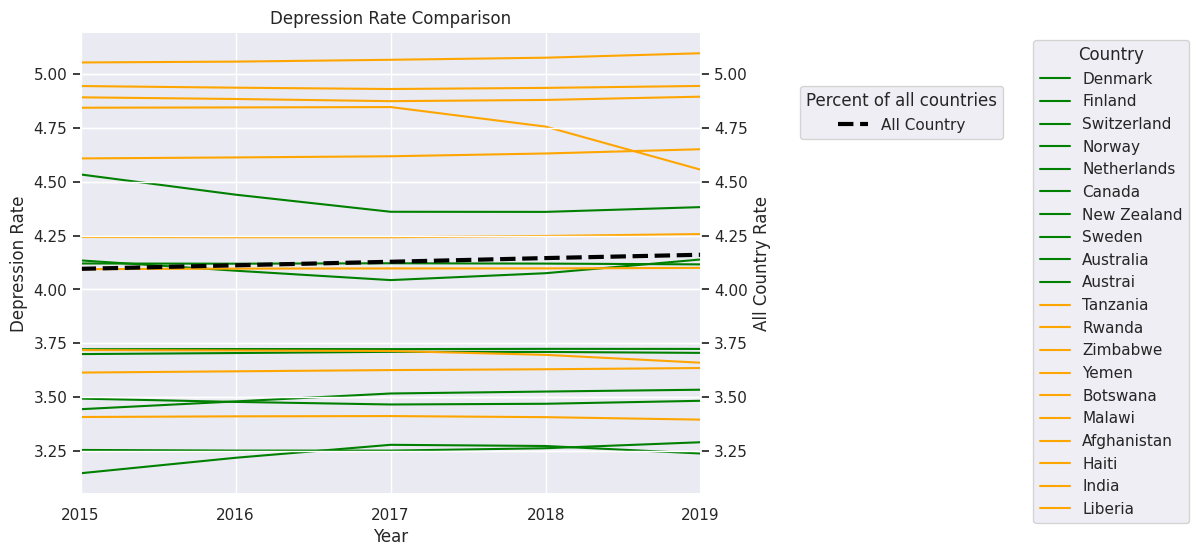

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("%depression by year country.csv")

# Select_country
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
filtered_df = df[df['Entity'].isin(countries)]
filtered_df = filtered_df[filtered_df['Year'].isin(range(2015, 2020))]  # Include year 2019

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each line separately
for country in countries:
    country_data = filtered_df[filtered_df['Entity'] == country]
    line_color = 'green' if country in ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai'] else 'orange'
    ax.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label=country, color=line_color)

ax2 = ax.twinx()  # Secondary y-axis
ax2.plot(filtered_df_all['Year'], filtered_df_all['%Depression'], linestyle='--', color='black', linewidth=3)  # Secondary y-axis, increased line thickness

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Depression Rate')
ax.set_title('Depression Rate Comparison')
ax2.set_ylabel('All Country Rate')

# Set the x-axis limits
ax.set_xlim(2015, 2019)

# Match the scale of ax2 to ax
ax2.set_ylim(ax.get_ylim())

# Display the legend outside the plot
ax.legend(title='Country', bbox_to_anchor=(1.8, 1))

# Add custom legend for ax2
ax2.legend(['All Country'], title='Percent of all countries', bbox_to_anchor=(1.5, 0.9))

# Format x-axis tick labels to remove decimal places
plt.xticks(range(2015, 2020))
# Show the plot
plt.show()


2.3.Graph :เปรียบเทียบ Percent การเป็น Anxiety แต่ละประเทศ VS ทุกประเทศ ในแต่ละปี(2015-2019)

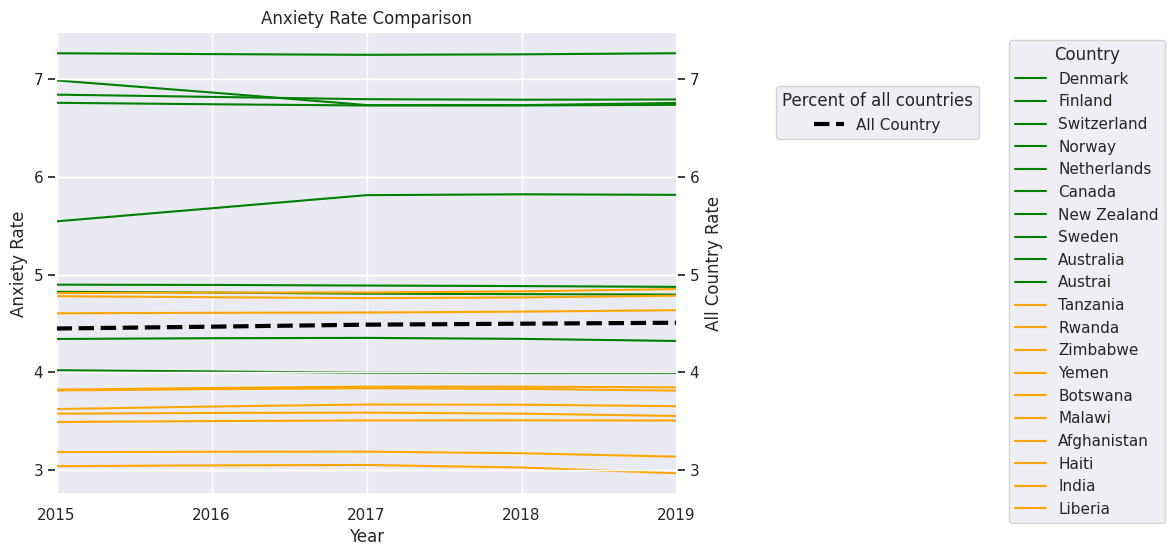

In [ ]:


# Read the CSV file into a DataFrame
df = pd.read_csv("percent disorder type-by country and year.csv")

#Select_country
countries = ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai','Tanzania','Rwanda','Zimbabwe','Yemen','Botswana','Malawi','Afghanistan','Haiti','India','Liberia']
filtered_df = df[df['Entity'].isin(countries)]
filtered_df = filtered_df[filtered_df['Year'].isin(range(2015, 2020))]  # Include year 2019

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each line separately
for country in countries:
    country_data = filtered_df[filtered_df['Entity'] == country]
    line_color = 'green' if country in ['Denmark', 'Finland', 'Switzerland', 'Norway', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia','Austrai'] else 'orange'
    #ax.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label=country, color=line_color)
    ax.plot(country_data['Year'], country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], label=country,color=line_color)


ax2 = ax.twinx()  # Secondary y-axis

# ax2.plot(filtered_df_all['Year'], filtered_df_all['%Depression'], linestyle='--', label='all')  # Secondary y-axis
ax2.plot(filtered_df_all['Year'], filtered_df_all['%Anxiety'], linestyle='--', color='black',linewidth=3)  # Secondary y-axis

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Anxiety Rate')
ax.set_title('Anxiety Rate Comparison')
ax2.set_ylabel('All Country Rate')

# Set the x-axis limits
ax.set_xlim(2015, 2019)

# Match the scale of ax2 to ax
ax2.set_ylim(ax.get_ylim())

# Display the legend outside the plot
ax.legend(title='Country', bbox_to_anchor=(1.8, 1))

# Add custom legend for ax2
ax2.legend(['All Country'], title='Percent of all countries', bbox_to_anchor=(1.5, 0.9))

# Format x-axis tick labels to remove decimal places
plt.xticks(range(2015, 2020))

# Show the plot
plt.show()

